In [1]:
### install, import, download


!pip install mlxtend

import pandas as pd                                             #for dataframe operations
import numpy as np                                              #for array operations

import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend : machine learning extensions

import random
import matplotlib.pyplot as plt                                 ## it shows immediatly after matplot lib if not we have to do plt.show()
%matplotlib inline 


import networkx as nx

from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV          # To split the data

from sklearn.cluster import KMeans,AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage, dendrogram

#from imblea import CondensedNearestNeighbour                    # Implementation based on Hart's condensed knn

#### Install surprise package

#!pip install scikit-surprise
#!pip install surprise
#! conda install -c conda-forge scikit-surprise
#from surprise import BaselineOnly

#from surprise import BaselineOnly
#from surprise import Dataset
#from surprise import Reader, KNNWithMeans
#from surprise.model_selection import cross_validate
#from collections import defaultdict
#from itertools import islice

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

!pip install xgboost

from sklearn.svm import SVC

import statsmodels.formula.api as sm                           #logistic regression
from scipy.stats import mode

!pip install graphviz
import graphviz
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn import tree

!pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


import pandas_profiling as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

  Using cached https://files.pythonhosted.org/packages/96/84/4e2cae6247f397f83d8adc5c2a2a0c5d7d790a14a4c7400ff6574586f589/xgboost-0.90.tar.gz


ERROR: Files/directories not found in C:\Users\DRJHAN~1.SSV\AppData\Local\Temp\pip-install-2m3dedz1\xgboost\pip-egg-info


In [2]:
train_dt = pd.read_csv("train.csv")
test_dt = pd.read_csv("test.csv")


In [3]:
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pp.ProfileReport(train_dt)

Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,66.2 KiB
Average record size in memory,76.0 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [5]:
#!pip install plotly
#!pip install cufflinks

  Stored in directory: C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [5]:
train_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_dt.isna().sum()/(train_dt.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [18]:
train_data.shape

(891, 12)

In [19]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

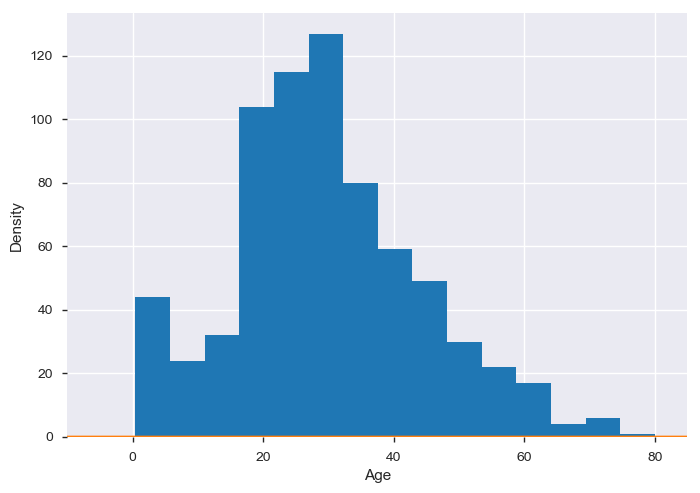

In [12]:
ax=train_dt["Age"].hist(bins=15)
train_dt["Age"].plot(kind='density')
ax.set(xlabel="Age")
plt.xlim(-10,85)
plt.show

since the above graph show that the data is right skewed and because of which we cant impute the missing values with mean but we will impute with median


In [15]:
print("the mean of the age data is:",train_dt["Age"].mean(skipna=True))
print("the median of the age data is:",train_dt["Age"].median(skipna=True))

the mean of the age data is: 29.69911764705882
the median of the age data is: 28.0


In [16]:
train_dt["Age"].fillna(train_dt["Age"].median(skipna=True),inplace=True)


In [ ]:
tr

In [17]:
train_dt["Age"].isna().sum()

0

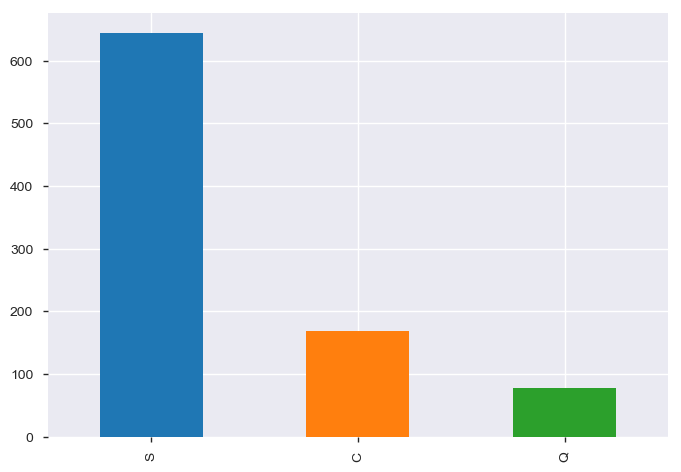

In [19]:
train_dt["Embarked"].value_counts().plot(kind="bar")

In [20]:
train_dt["Embarked"].fillna(train_dt["Embarked"].value_counts().idxmax(),inplace=True)

In [26]:
train_dt["Embarked"].isna().sum()

0

In [27]:
train_dt.drop("Cabin",axis=1,inplace=True)

In [28]:
train_dt.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
test_dt.drop("Cabin",axis=1,inplace=True)
test_dt["Embarked"].fillna(train_dt["Embarked"].value_counts().idxmax(),inplace=True)
test_dt["Embarked"].fillna(train_dt["Age"].median(skipna=True),inplace=True)

In [30]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [31]:
from sklearn.preprocessing import LabelEncoder

In [33]:
ohe = OneHotEncoder(categorical_features=[10])


In [37]:
training=pd.get_dummies(train_dt, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

train_dt = training
train_dt.head()


,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


In [41]:
train_dt=pd.get_dummies(train_dt,columns=["SibSp"])

In [42]:
train_dt.head()

,Survived,Age,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,0,22.0,0,7.2500,0,0,1,0,0,1,1,0,1,0,0,0,0,0
1,1,38.0,0,71.2833,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,1,35.0,0,53.1000,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,35.0,0,8.0500,0,0,1,0,0,1,1,1,0,0,0,0,0,0


In [43]:
train_dt=pd.get_dummies(train_dt,columns=["Parch"])

In [44]:
train_dt.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,...,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,22.0,7.2500,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,1,38.0,71.2833,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35.0,53.1000,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,35.0,8.0500,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [46]:
test_dt = pd.get_dummies(test_dt, columns=["Pclass","Embarked","Sex"])
test_dt.drop('Sex_female', axis=1, inplace=True)
test_dt.drop('PassengerId', axis=1, inplace=True)
test_dt.drop('Name', axis=1, inplace=True)
test_dt.drop('Ticket', axis=1, inplace=True)

test_dt=pd.get_dummies(test_dt,columns=["Parch"])
test_dt=pd.get_dummies(test_dt,columns=["SibSp"])

In [47]:
test_dt.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Parch_0,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.5,7.8292,0,0,1,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,47.0,7.0000,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,62.0,9.6875,0,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,27.0,8.6625,0,0,1,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
4,22.0,12.2875,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


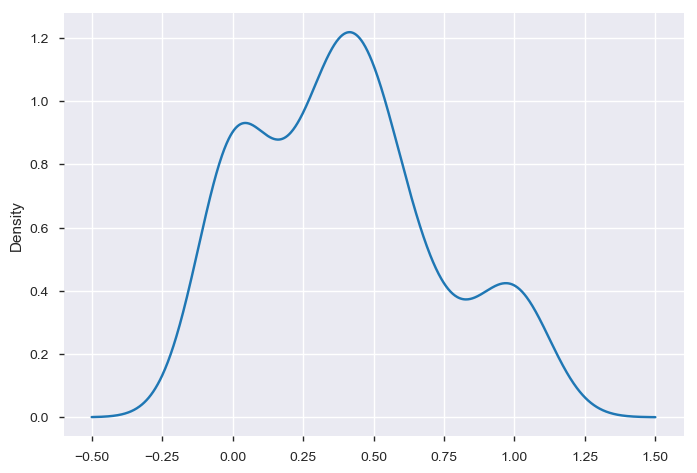

In [51]:
train_dt[["Age","Survived"]].groupby(["Age"],as_index=True)["Survived"].mean().plot(kind="density")

In [52]:
train_dt["Minor"]=np.where(train_dt["Age"]<=16, 1, 0)
test_dt["Minor"]=np.where(test_dt["Age"]<=16, 1, 0)

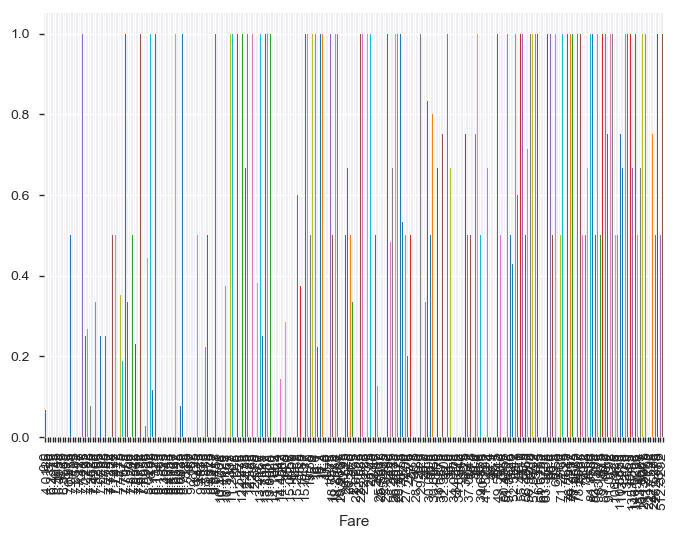

In [54]:
train_dt[["Fare","Survived"]].groupby(["Fare"],as_index=True)["Survived"].mean().plot(kind="bar")

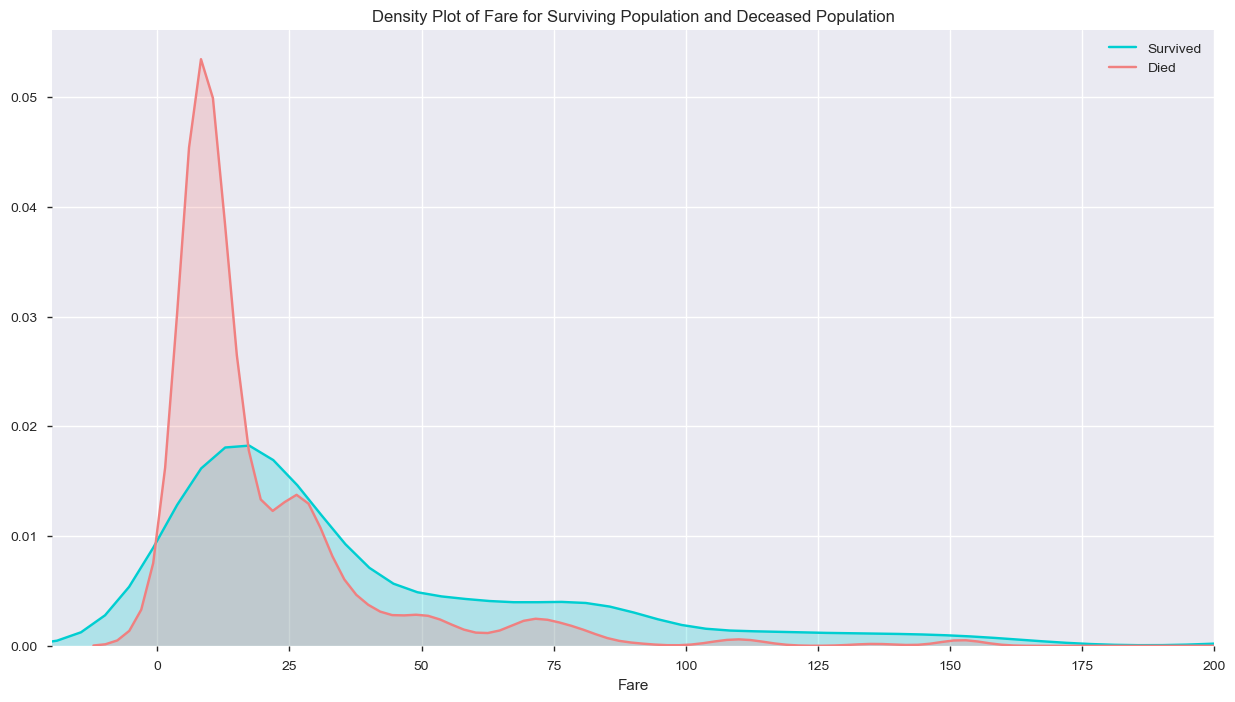

In [64]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_dt["Fare"][train_dt.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_dt["Fare"][train_dt.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

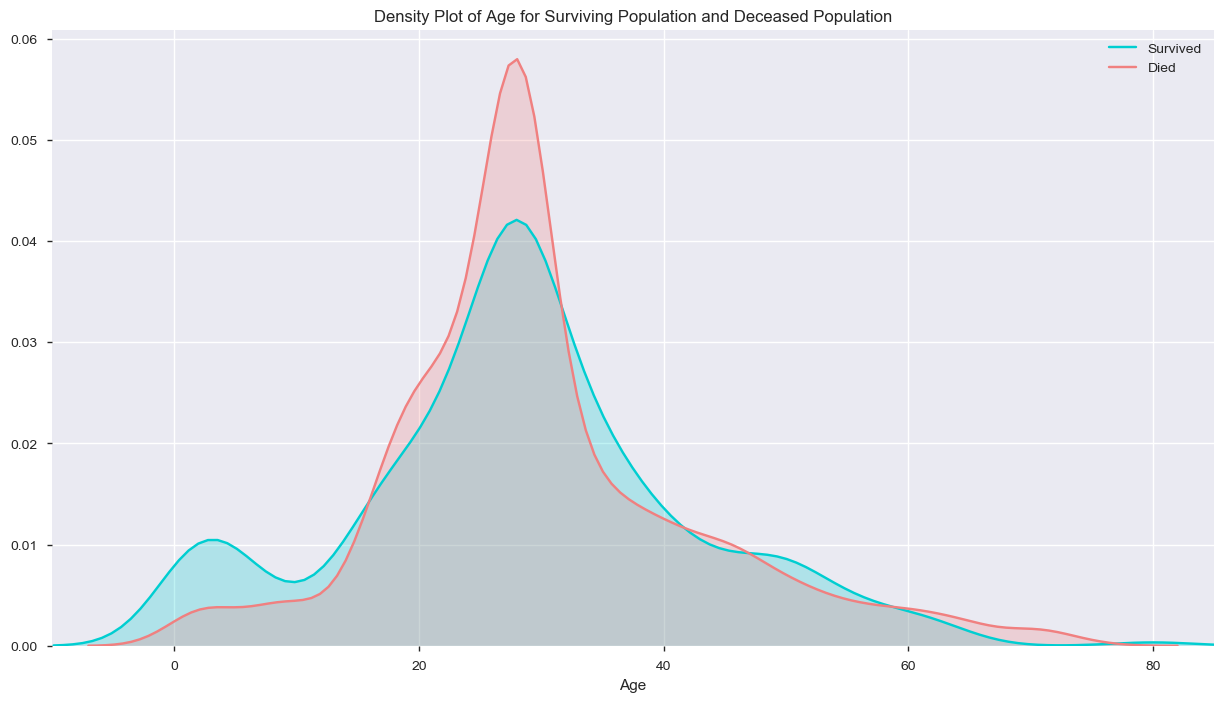

In [66]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_dt["Age"][train_dt.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(train_dt["Age"][train_dt.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [84]:
cols = ["Age","Fare","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","Minor"] 
X = train_dt[cols]
y = train_dt['Survived']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [86]:
from sklearn.linear_model import LogisticRegression
logmod=LogisticRegression()
logmod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
logit=sm.Logit(y_train,X_train)

In [88]:
result=logit.fit()

Optimization terminated successfully.
         Current function value: 0.451594
         Iterations 6


In [89]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.318     
Dependent Variable: Survived         AIC:              578.6862  
Date:               2019-07-02 17:07 BIC:              614.1625  
No. Observations:   623              Log-Likelihood:   -281.34   
Df Model:           7                LL-Null:          -412.34   
Df Residuals:       615              LLR p-value:      7.7006e-53
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age          -0.0137    0.0106   -1.3003  0.1935  -0.0345   0.0070
Fare          0.0018    0.0027    0.6851  0.4933  -0.0034   0.0071
Pclass_1      1.9799    0.3346    5.9173  0.0000   1.3241   2.6357
Pclass_2      1.3737    0.2710    5.0697  0.0000   0.8426   1.9047
Embarked_C    0.9625    0.3415    2.8185  0.0048   0.2932   1.6318
Embarked_S    0.2025    0.2765    0.7323  0.4640  -0.3394   0.7444
Sex_male     -2.3178    0.2222  -10.4317  0.0000  -2.7533  -1.8824
Minor         0.0033    0.3700    0.0090  0.9929  -0.7218   0.7284
=================================================================

"""

In [104]:
from sklearn.metrics import roc_curve

In [112]:
log_mod=logmod.fit(X_train,y_train)
print(log_mod.coef_)
print(log_mod.intercept_)

[[-1.73804129e-02  1.92553637e-03  1.90535659e+00  1.26192347e+00
   2.24165910e-01 -4.90786847e-01 -2.26160701e+00 -4.43884716e-01]]
[1.2163219]


C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [113]:
test_pred=log_mod.predict(X_test)
confusion_matrix(y_true=y_test,y_pred=test_pred)

array([[145,  15],
       [ 39,  69]], dtype=int64)

In [126]:
train_pred=logmod.predict_proba(X_train)
print(len(train_pred))
print(train_pred[0:10])

623
[[0.62078821 0.37921179]
 [0.36516791 0.63483209]
 [0.14182447 0.85817553]
 [0.61896143 0.38103857]
 [0.88395418 0.11604582]
 [0.18777468 0.81222532]
 [0.07042679 0.92957321]
 [0.77107895 0.22892105]
 [0.25820361 0.74179639]
 [0.92067817 0.07932183]]


In [127]:
success=[i[1]for i in train_pred]

In [128]:
fpr,tpr,thresholds=roc_curve(y_true=y_train,y_score=success)
res=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})

In [129]:
res[180:250]

,FPR,TPR,Threshold
180,0.781491,0.965812,0.079366
181,0.799486,0.965812,0.079358
182,0.802057,0.965812,0.079340
183,0.835476,0.965812,0.079336
184,0.840617,0.965812,0.079322
185,0.843188,0.970085,0.079319
186,0.848329,0.970085,0.079254
187,0.856041,0.970085,0.079245
188,0.868895,0.970085,0.077958
189,0.868895,0.974359,0.077053


In [131]:
confusion_matrix(y_true=y_test,y_pred=tes_pred1)

array([[ 24, 136],
       [  2, 106]], dtype=int64)

In [133]:
accuracy_score(y_test,test_pred)

0.7985074626865671

now lets remove fare from the data 

In [134]:
train_dt.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Minor'],
      dtype='object')

In [136]:
cols = ["Age","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","Minor"] 
X = train_dt[cols]
y = train_dt['Survived']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [138]:
logmod1 = LogisticRegression()
logmod1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [139]:
logmod1 = logmod1.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [140]:
test_pred1 = logmod1.predict(X_test)

In [141]:
confusion_matrix(y_pred=test_pred1,y_true=y_test)

array([[148,  26],
       [ 28,  66]], dtype=int64)

In [142]:
accuracy_score(y_test,test_pred1)

0.7985074626865671

In [144]:
cols = ["Age","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","Minor"] 
test_dt = test_dt[cols]

In [146]:
test_dt.isna().sum()

Age           86
Pclass_1       0
Pclass_2       0
Embarked_C     0
Embarked_S     0
Sex_male       0
Minor          0
dtype: int64

In [147]:
test_dt["Age"].fillna(train_dt["Age"].median(skipna=True),inplace=True)

In [148]:
validation_pred = logmod1.predict(test_dt)

In [149]:
validation_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [150]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


In [152]:
train_dt.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Minor'],
      dtype='object')

In [153]:
Selected_features = ['Age','SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6' , 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'Minor']

In [154]:
X=train_dt[Selected_features]
y=train_dt["Survived"]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [157]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
unseen_x_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)


C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [159]:
accuracy_score(y_test, unseen_x_test_pred)

0.7877094972067039

In [161]:
log_loss(y_test,y_pred_proba)

0.5058882125839792

In [162]:
auc(fpr, tpr)

0.8351898734177214

In [164]:
idx = np.min(np.where(tpr > 0.95))
idx

56

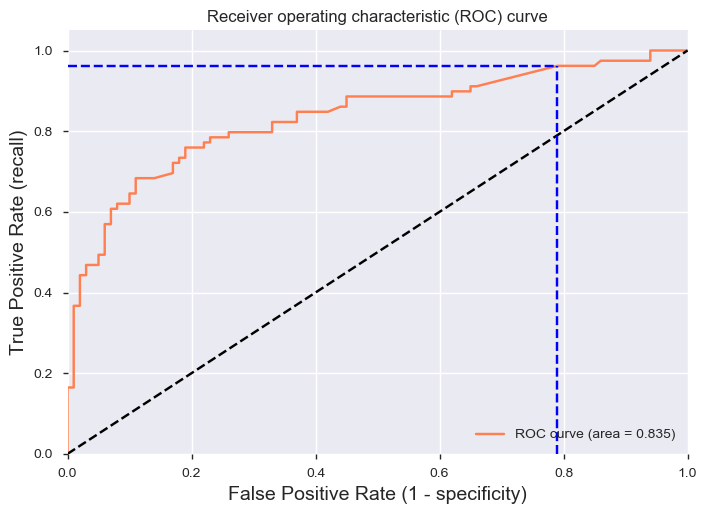

In [165]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [166]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default s

K-fold cross-validation results:
LogisticRegression average accuracy is 0.805
LogisticRegression average log_loss is 0.445
LogisticRegression average auc is 0.857


C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default s

In [167]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))


K-fold cross-validation results:
LogisticRegression average accuracy: 0.805 (+/-0.023)
LogisticRegression average log_loss: 0.445 (+/-0.037)
LogisticRegression average auc: 0.857 (+/-0.025)


C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default s